<a href="https://colab.research.google.com/github/bethanywallace/DetectionModels/blob/main/Image_Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Image_Detections
!git clone https://github.com/bethanywallace/DetectionModels.git

/content/drive/MyDrive/Image_Detections
fatal: destination path 'DetectionModels' already exists and is not an empty directory.


Clone the TensorFlow api from GitHub

In [4]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 56829, done.
remote: Counting objects: 100% (444/444), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 56829 (delta 258), reused 334 (delta 166), pack-reused 56385
Receiving objects: 100% (56829/56829), 572.56 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (39208/39208), done.
Checking out files: 100% (2410/2410), done.


Install the API:



In [5]:
!sudo apt install -y protobuf-compiler
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install -q .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/content/drive/My Drive/Image_Detections/models/research/models/research
     |████████████████████████████████| 9.6MB 8.9MB/s 
     |████████████████████████████████| 358kB 37.7MB/s 
     |████████████████████████████████| 1.1MB 32.5MB/s 
     |████████████████████████████████| 153kB 41.2MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 829kB 40.0MB/s 
     |████████████████████████████████| 2.3MB 41.6MB/s 
     |████████████████████████████████| 174kB 52.5MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 706kB 46.3MB/s 
   

In [6]:
import os
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

#change based on model being tested
PATH_TO_SAVED_MODEL = "/content/drive/MyDrive/Image_Detections/DetectionModels/mobilenet_10000steps_24batchsize/saved_model"

Upload the saved model folder and then load it in using the tf load model function

In [7]:
print('Loading model...', end='')
start_time = time.time()
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Model loaded in {} seconds'.format(elapsed_time))

Loading model...Model loaded in 19.899516582489014 seconds


Upload the label map and then load it into the category index

In [8]:
PATH_TO_LABELS = '/content/drive/MyDrive/Image_Detections/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'a'}, 2: {'id': 2, 'name': 'b'}, 3: {'id': 3, 'name': 'c'}, 4: {'id': 4, 'name': 'd'}, 5: {'id': 5, 'name': 'e'}, 6: {'id': 6, 'name': 'f'}, 7: {'id': 7, 'name': 'g'}, 8: {'id': 8, 'name': 'h'}, 9: {'id': 9, 'name': 'i'}, 10: {'id': 10, 'name': 'j'}, 11: {'id': 11, 'name': 'k'}, 12: {'id': 12, 'name': 'l'}, 13: {'id': 13, 'name': 'm'}, 14: {'id': 14, 'name': 'n'}, 15: {'id': 15, 'name': 'o'}, 16: {'id': 16, 'name': 'p'}, 17: {'id': 17, 'name': 'q'}, 18: {'id': 18, 'name': 'r'}, 19: {'id': 19, 'name': 's'}, 20: {'id': 20, 'name': 't'}, 21: {'id': 21, 'name': 'u'}, 22: {'id': 22, 'name': 'v'}, 23: {'id': 23, 'name': 'w'}, 24: {'id': 24, 'name': 'x'}, 25: {'id': 25, 'name': 'y'}, 26: {'id': 26, 'name': 'z'}, 27: {'id': 27, 'name': 'h2'}, 28: {'id': 28, 'name': 'j2'}, 29: {'id': 29, 'name': 'j3'}}


To start detecting from single images, use util methods from TensorFlow tutorials. The downloaded utils are from a TensorFlow tutorial:
https://blog.tensorflow.org/2021/01/custom-object-detection-in-browser.html

In [9]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2021-05-04 11:18:50--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0.001s  

2021-05-04 11:18:50 (2.53 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



In [10]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)

  input_tensor = tf.convert_to_tensor(image)

  input_tensor = input_tensor[tf.newaxis,...]

  output_dict = model(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
  return output_dict

def show_inference(model, image_path):

  image_np = image_path
  image_np=cv2.cvtColor(image_np,cv2.COLOR_BGR2RGB)

  output_dict = run_inference_for_single_image(model, image_np)

  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  image_np=cv2.cvtColor(image_np,cv2.COLOR_BGR2RGB)
  return image_np

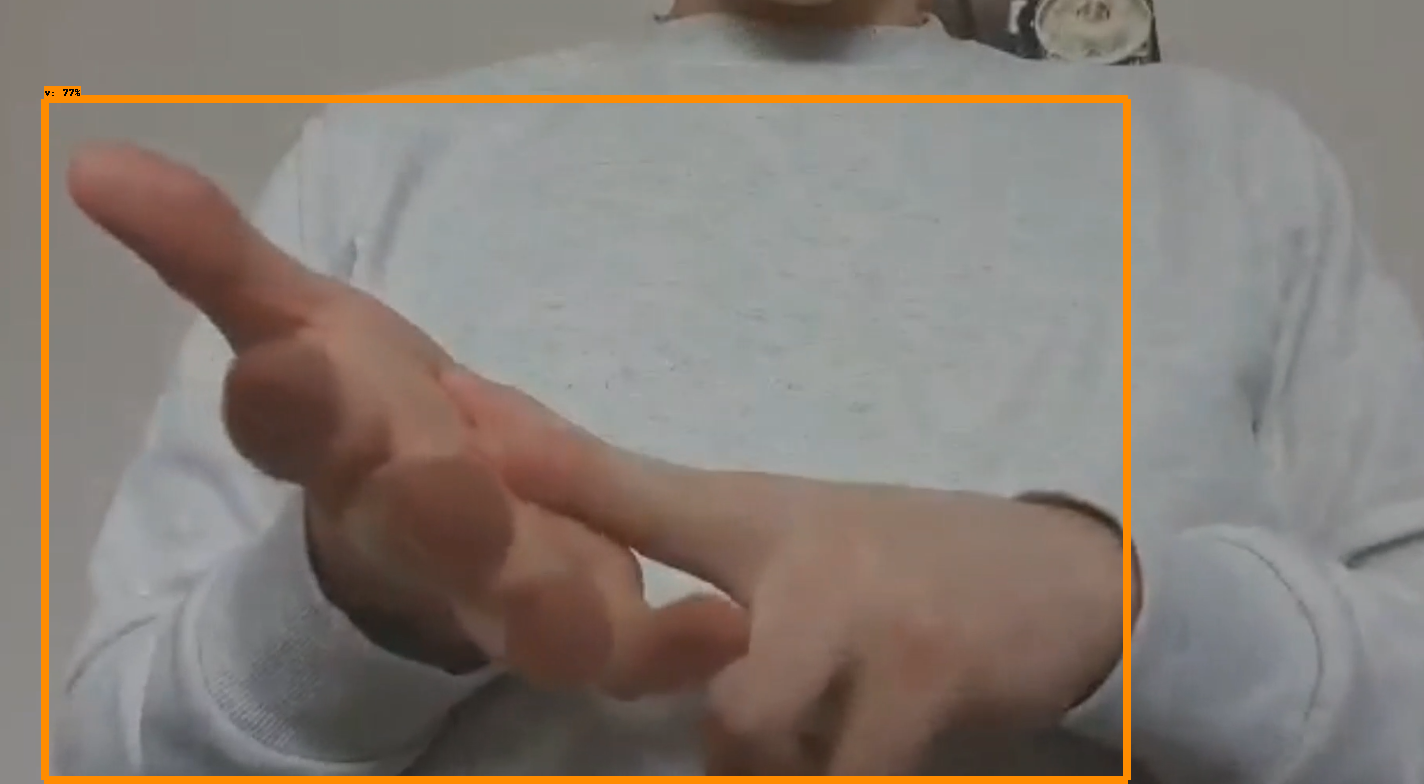

In [18]:
import cv2
from google.colab.patches import cv2_imshow


img=cv2.imread('/content/drive/MyDrive/Image_Detections/Images/Ryan/v.PNG')

item = show_inference(detect_fn,img)
cv2_imshow(item)

In [ ]:
!rm -rf '/content/8_5000'